## Анализируем лица с помощью искусственного интеллекта

Большое количество контента в интернет/соц.сетях - это изображения. Мы можем использовать нейросетевые модели для извлечения из изображений глубинной информации о содержимом, например:
 * Для каждого из людей на фото - пол, возраст, испытываемые эмоции, наличие аксессуаров на лице
 * Список объектов на фотографии
 * Контекст: в помещении, на улице
 * Тип фото: портрет, групповое фото, пейзаж
 * Цветовая гамма
 
В нашем случае мы сконцентрируемся на извлечении информации о людях. Для извлечения эмоций используем библиотеку [DeepFace](https://pypi.org/project/deepface/):

In [3]:
import sys
!{sys.executable} -m pip install deepface

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import cv2
import imageio.v3 as iio
import matplotlib.pyplot as plt

Для анализа лица служит функция `analyze`:

In [19]:
DeepFace.analyze("../../../data/images/dsh_fall_sqr_small.JPG")

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]   


{'emotion': {'angry': 11.140315072574028,
  'disgust': 0.0011833501549554709,
  'fear': 0.11831042603006077,
  'happy': 83.5462729389993,
  'sad': 0.11827849330347696,
  'surprise': 0.2650479170737168,
  'neutral': 4.810592360567136},
 'dominant_emotion': 'happy',
 'region': {'x': 33, 'y': 53, 'w': 86, 'h': 86},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.6553309038281441,
  'indian': 3.0351547524333,
  'black': 0.19891236443072557,
  'white': 45.8880752325058,
  'middle eastern': 23.768138885498047,
  'latino hispanic': 26.454389095306396},
 'dominant_race': 'white'}

Поскольку такая функция анализирует только одно лицо, нам необходимо сначала извлечь все лица на фотографии. Это можно сделать с помощью `FaceDetector`:

In [20]:
detector = FaceDetector.build_model("mtcnn")

img = iio.imread("http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg")
detector.detect_faces(img)

[{'box': [483, 198, 40, 43],
  'confidence': 0.9999978542327881,
  'keypoints': {'left_eye': (492, 214),
   'right_eye': (511, 211),
   'nose': (501, 224),
   'mouth_left': (495, 232),
   'mouth_right': (513, 230)}},
 {'box': [921, 169, 57, 71],
  'confidence': 0.9999954700469971,
  'keypoints': {'left_eye': (938, 195),
   'right_eye': (964, 195),
   'nose': (951, 210),
   'mouth_left': (939, 221),
   'mouth_right': (962, 221)}},
 {'box': [633, 198, 51, 66],
  'confidence': 0.9999659061431885,
  'keypoints': {'left_eye': (647, 225),
   'right_eye': (671, 224),
   'nose': (659, 240),
   'mouth_left': (648, 247),
   'mouth_right': (672, 246)}},
 {'box': [350, 187, 41, 50],
  'confidence': 0.9997923970222473,
  'keypoints': {'left_eye': (362, 206),
   'right_eye': (382, 203),
   'nose': (376, 209),
   'mouth_left': (366, 224),
   'mouth_right': (386, 221)}}]

Теперь построим свою функцию `analyze`, которая сначала выделяет лица, и потом анализирует каждое из них: 

In [21]:
def analyze(img):
    res = detector.detect_faces(img)
    z = []
    for x in res:
        bb = x['box']
        fc = img[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2],:]
        a = DeepFace.analyze(fc,enforce_detection=False,prog_bar=False)
        z.append({ "box" : bb, "face" : fc, 
                   "emotion" : a['emotion'], "dominant_emotion" : a['dominant_emotion'], 
                   "age" : a['age'], "gender" : a['gender']})
    return z
    
analyze(img)

[{'box': [483, 198, 40, 43],
  'face': array([[[ 27,  24,  19],
          [ 27,  26,  22],
          [ 26,  25,  23],
          ...,
          [ 54,  42,  44],
          [ 49,  37,  39],
          [ 42,  30,  30]],
  
         [[ 25,  22,  17],
          [ 26,  23,  18],
          [ 24,  23,  19],
          ...,
          [ 43,  33,  34],
          [ 38,  28,  26],
          [ 35,  25,  23]],
  
         [[ 23,  20,  15],
          [ 22,  19,  14],
          [ 22,  19,  14],
          ...,
          [ 33,  25,  22],
          [ 32,  24,  21],
          [ 32,  24,  22]],
  
         ...,
  
         [[ 50,  36,  27],
          [ 39,  26,  18],
          [ 35,  26,  19],
          ...,
          [163, 128, 124],
          [139, 106,  99],
          [108,  74,  64]],
  
         [[ 52,  38,  29],
          [ 44,  27,  19],
          [ 36,  26,  17],
          ...,
          [142, 107, 101],
          [122,  85,  76],
          [114,  78,  66]],
  
         [[ 60,  48,  34],
          [ 45

### Анализируем фотографии с летней школы

Проанализируем фотографии с летней школы ИИ, расположенные в интернет [вот тут](http://psy.msu.ru/science/conference/summer/2019/photo/index.html).
Можно заметить, что все фотографии имеют адрес http://psy.msu.ru/science/conference/summer/2019/photo/xxx.jpg, где xxx - номер фото, от 000 до 131.

In [23]:
urls = ["http://psy.msu.ru/science/conference/summer/2019/photo/{:03d}.jpg".format(i) for i in range(1,131)]

In [24]:
import pandas as pd
import ipyplot

In [25]:
ipyplot.plot_images(urls[::10],img_width=150)

In [44]:
data = []
imgs = []
for x in urls:
    print("Analyzing {} ...".format(x),end='')
    img = iio.imread(x)
    res = analyze(img)
    nfaces = len(res)
    print(nfaces, ' faces')
    for t in res:
        em = t['emotion']
        z = { 'gender' : t['gender'], 'age' : t['age'], 'nfaces' : nfaces }
        data.append(dict(list(z.items())+list(em.items())))
        imgs.append(t['face'])
print("Found {} faces".format(len(data)))

Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/001.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/002.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/003.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/004.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/005.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/006.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/007.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/008.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/009.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/010.jpg ...3  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg ...4  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/

In [60]:
import json
import pickle
with open('data.json','w') as f:
    json.dump(data,f)
with open('imgs.pkl','wb') as f:
    pickle.dump(imgs,f)

Вот как можно загрузить сохранённые данные:

In [61]:
with open('data.json','r') as f:
    data = json.load(f)
with open('imgs.pkl','rb') as f:
    imgs = pickle.load(f)

Преобразуем данные к DataFrame для анализа:

In [28]:
df = pd.DataFrame(data)
df

,gender,age,nfaces,angry,disgust,fear,happy,sad,surprise,neutral
0,Woman,24,1,5.834892e-02,7.832160e-04,6.852371e-03,98.758876,2.734336e-01,1.509117e-04,0.901555
1,Woman,21,1,2.471078e-03,2.540359e-05,2.550950e-02,90.889478,2.167603e-02,1.285500e-02,9.047981
2,Woman,32,3,1.115668e-14,1.659215e-23,9.126109e-18,99.999851,1.207591e-14,9.176879e-12,0.000151
3,Woman,29,3,3.959482e-08,4.759871e-18,2.578788e-09,99.836528,9.914193e-08,1.259880e-05,0.163462
4,Woman,29,3,4.558370e-04,6.824965e-07,1.013873e-02,99.901682,3.235222e-02,5.120883e-04,0.054853
...,...,...,...,...,...,...,...,...,...,...
688,Woman,29,9,9.448688e+00,1.220905e-11,2.405468e-03,0.000009,2.251337e+00,3.702707e-08,88.297558
689,Woman,25,9,9.315109e-04,6.623176e-08,4.596107e-03,85.658526,8.236981e-02,3.511142e-02,14.218470
690,Woman,26,9,2.942863e-05,2.152721e-10,4.517647e-06,99.899697,1.408907e-04,6.051836e-05,0.100066
691,Woman,23,9,1.584902e-01,2.325419e-10,2.290905e-04,0.017199,8.155143e-02,7.759774e-05,99.742448


Мы загрузили все данные в `DataFrame` по имени `df`, и дальше попробуем его проанализировать. Ниже, когда мы загрузим данные из другого источника, мы сможем перейти снова к этой ячейке и построить графики, просто выполняя ячейки одну за другой.

Можем сохранить данные на диск, что впоследствии можно было для демонстрации их быстро загрузить

In [56]:
df.to_pickle('data_conf.pkl')

In [58]:
df = pd.read_pickle('data_conf.pkl')

## Смотрим на результаты графически

Посмотрим на распределение возрастов на конференции:

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

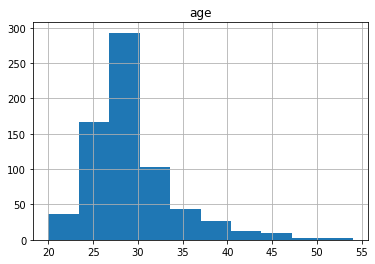

In [29]:
df.hist('age')

А как распределен уровень счастья?

array([[<AxesSubplot:title={'center':'happy'}>]], dtype=object)

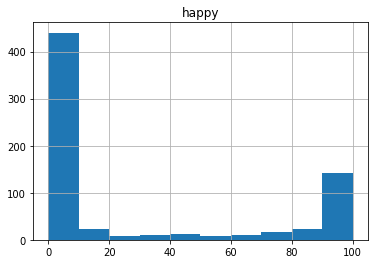

In [31]:
df.hist('happy')

Можем также построить зависимость счастья от возраста:

<AxesSubplot:xlabel='age', ylabel='happy'>

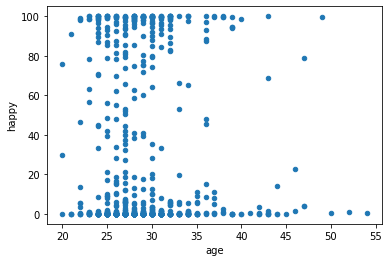

In [32]:
df.plot.scatter('age','happy')

Посмотрим на распределение счастья в зависимости от пола:

<AxesSubplot:xlabel='gender'>

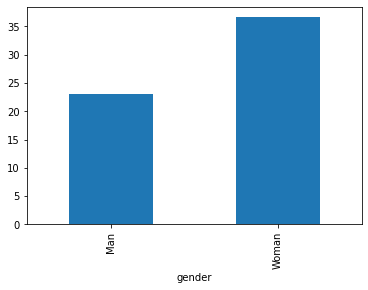

In [33]:
df.groupby('gender').mean()['happy'].plot.bar()

**Вывод:** девушки более счастливы!

И в зависимости от количества лиц на фотографии:

<AxesSubplot:xlabel='nfaces'>

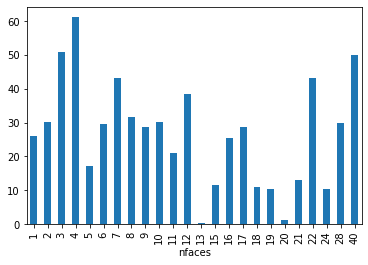

In [34]:
df.groupby('nfaces').mean()['happy'].plot.bar()

**Вывод:** фотографироваться в компании немного веселее, но не сильно.

Наконец, распределение среднего счасться по возрастным группам:

<AxesSubplot:xlabel='age'>

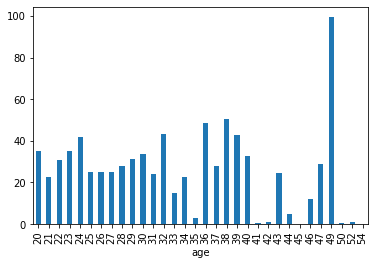

In [35]:
df.groupby('age').mean()['happy'].plot.bar()

<AxesSubplot:xlabel='age_group'>

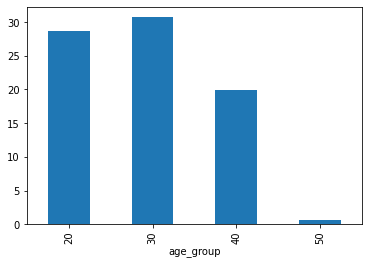

In [37]:
df['age_group'] = (df['age'] // 10)*10
df.groupby('age_group').mean()['happy'].plot.bar()

Если счастье убывает, то интересно посмотреть, какие эмоции возрастают. Например, аналогичная динамика для грусти:

<AxesSubplot:xlabel='age_group'>

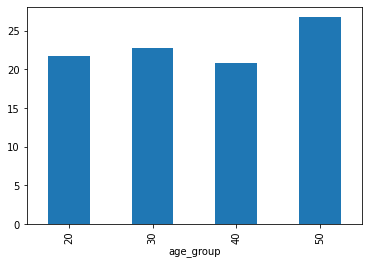

In [38]:
df.groupby('age_group').mean()['sad'].plot.bar()

Посмотрим на средние эмоции людей:

<AxesSubplot:>

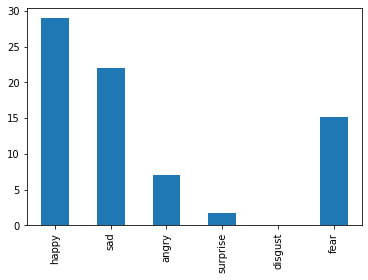

In [39]:
df.mean()[['happy','sad','angry','surprise','disgust','fear']].plot.bar()

Тоже самое по мужчинам и по женщинам:

<AxesSubplot:>

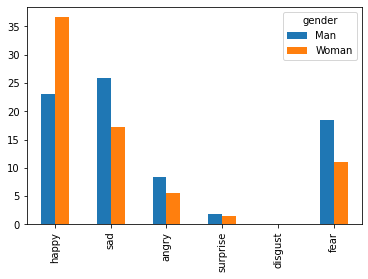

In [40]:
df.groupby('gender').mean()[['happy','sad','angry','surprise','disgust','fear']].T.plot.bar()

### Смотрим на лица

Поскольку у нас также есть сами изображения, попробуем найти самые ярко-выраженные эмоции на фотографиях:

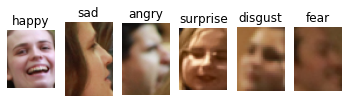

In [62]:
emotions = ['happy','sad','angry','surprise','disgust','fear']
emos = { t:(0,None) for t in emotions}
for x,im in zip(data,imgs):
    for k,v in emos.items():
        if x[k]>v[0]:
            emos[k]=(x[k],im)
fix,ax = plt.subplots(1,len(emos.keys()))
for i,e in enumerate(emos.keys()):
    if emos[e][1] is not None:
        ax[i].imshow(emos[e][1])
        ax[i].axis('off')
        ax[i].set_title(e)
plt.show()

Теперь найдём наиболее "противоречивую" эмоцию, в которой две составляющих проявлены наиболее сильно. Для этого ищем лицо, в котором максимально значение второй по величине эмоции, не считая нейтральной:

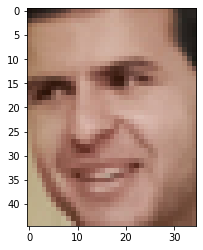

{'happy': 48.05147040197077,
 'sad': 0.143949602928734,
 'angry': 50.02323091168588,
 'surprise': 1.0954501958998881e-05,
 'disgust': 1.0661411278678656e-07,
 'fear': 0.00037834613503518296}

In [48]:
mx = 0
img = None
emo = None
for x,im in zip(data,imgs):
    em = { k: x[k] for k in emotions }
    snd = sorted(em.values())[-2]
    if snd>mx:
        mx = snd
        img = im
        emo = em
plt.imshow(img)
plt.show()
emo

## Кластеризация лиц по эмоциям 

Полученные результаты могут использоваться для дальнейших исследований с помощью алгоритмов машинного обучения. Например, мы увидели выше интресное сочетание эмоций. Можем посмотреть, выделяются ли среди всех лиц некоторые "типичные" конфигурации. Для этого необходимо применить алгоритм кластеризации, который реализован в библиотеке *Scikit Learn*:

In [49]:
import sklearn.cluster
import numpy as np
inp = np.array([ [ x[e] for e in emotions ] for x in data])
centroid, labels, inertia = sklearn.cluster.k_means(inp,3)

Мы попросили разбить все лица на 3 кластера, на основе расстояний между векторами эмоций. Теперь посмотрим на то, какие конфигурации эмоций у нас получились в центре таких кластеров (они возвращены в переменной `centroids`), и на наиболее "характерные" (близкие по расстоянию) лица для каждого из кластеров

In [52]:
def closest_face(e):
    mi = 999
    el = None
    for i,x in enumerate(data):
        if np.linalg.norm(inp[i]-e)<mi:
            mi=np.linalg.norm(inp[i]-e)
            el=i
    return imgs[el]

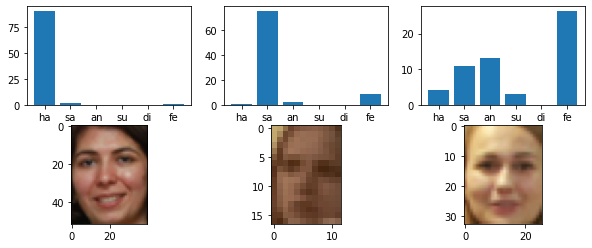

In [53]:
fig,ax = plt.subplots(2,len(centroid),figsize=(10,4))
for i,x in enumerate(centroid):
    ax[0,i].bar([t[0:2] for t in emotions],x)
    ax[1,i].imshow(closest_face(x))
plt.show()

Посмотрим на все лица в интересном кластере 0:

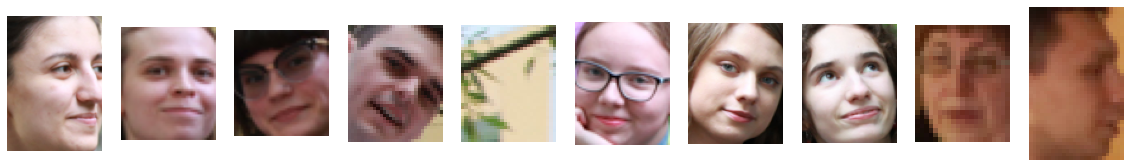

In [58]:
cluster = 2
n=10

res = [im for x,i,im in zip(data,labels,imgs) if i==cluster]
fig,ax = plt.subplots(1,len(res[:n]),figsize=(20,4))
for i,x in enumerate(res[:n]):
    ax[i].imshow(x)
    ax[i].axis('off')
plt.show()

## Экспериментируйте!

Мы видим, что многие изображения лиц слишком маленькие, что усложняет анализ эмоций. Попробуйте ограничить размер рассматриваемых лиц снизу некоторым числом и посмотрите, насколько изменятся результаты исследования. Естественно, можно рассмотреть и другой набор фотографий с мероприятия!